In [2]:
import pandas as pd

# Cargar únicamente la columna 'amenities' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=[ 'host_since', 'host_response_rate', 'host_acceptance_rate',
    'host_total_listings_count', 'latitude', 'longitude',
    'accommodates', 'bedrooms', 'price', 'minimum_nights',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'], delimiter=',', encoding='latin-1')

In [4]:
from datetime import datetime

# Convertir a datetime
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')

# Calcular antigüedad en días desde hoy
hoy = pd.to_datetime("today")
data['host_antiguedad_dias'] = (hoy - data['host_since']).dt.days


In [6]:
config_limpieza = {
    'host_response_rate':       {'erroneos': False,  'outliers': False},
    'host_acceptance_rate':     {'erroneos': False,  'outliers': False},
    'latitude':                 {'erroneos': False, 'outliers': False},
    'longitude':                {'erroneos': False, 'outliers': False},
    'review_scores_rating':     {'erroneos': False, 'outliers': False},
    'review_scores_accuracy':   {'erroneos': False, 'outliers': False},
    'review_scores_cleanliness':{'erroneos': False, 'outliers': False},
    'review_scores_checkin':    {'erroneos': False, 'outliers': False},
    'review_scores_communication':{'erroneos': False, 'outliers': False},
    'review_scores_location':   {'erroneos': False, 'outliers': False},
    'review_scores_value':        {'erroneos': False, 'outliers': False},
'host_antiguedad_dias': {'erroneos': False, 'outliers': True},

    'host_total_listings_count':{'erroneos': False,  'outliers': True},
    'accommodates':             {'erroneos': True,  'outliers': True},
    'bedrooms':                 {'erroneos': True,  'outliers': True},
    'minimum_nights':           {'erroneos': True,  'outliers': True},
    
}


In [8]:
def limpiar_variable(serie, aplicar_erroneos=False, aplicar_outliers=False):
    serie = serie.dropna()
    if aplicar_erroneos:
        serie = serie[serie > 0]
    if aplicar_outliers:
        q1 = serie.quantile(0.25)
        q3 = serie.quantile(0.75)
        iqr = q3 - q1
        li = q1 - 1.5 * iqr
        ls = q3 + 1.5 * iqr
        serie = serie[(serie >= li) & (serie <= ls)]
    return serie


In [9]:
variables_limpias = {}

for col, config in config_limpieza.items():
    try:
        limpia = limpiar_variable(
            data[col],
            aplicar_erroneos=config['erroneos'],
            aplicar_outliers=config['outliers']
        )
        variables_limpias[col] = limpia
    except Exception as e:
        print(f"❌ Error al limpiar {col}: {e}")


In [10]:
from scipy.stats import normaltest, shapiro
import pandas as pd

resultados = []

for nombre, serie in variables_limpias.items():
    n = len(serie)
    
    if n < 8:
        # Shapiro necesita al menos 3–8 datos para ser confiable
        conclusion = "⚠️ Muy pocos datos para evaluar"
        resultados.append({
            'Variable': nombre,
            'n': n,
            'Estadístico': None,
            'p-valor': None,
            'Prueba': 'Ninguna',
            'Conclusión': conclusion
        })
        continue

    if n < 20:
        # Shapiro-Wilk
        stat, p = shapiro(serie)
        prueba = 'Shapiro-Wilk'
    else:
        # D’Agostino-Pearson
        stat, p = normaltest(serie)
        prueba = 'D’Agostino-Pearson'

    conclusion = "✅ Normal" if p >= 0.05 else "❌ No Normal"

    resultados.append({
        'Variable': nombre,
        'n': n,
        'Estadístico': round(stat, 4),
        'p-valor': round(p, 4),
        'Prueba': prueba,
        'Conclusión': conclusion
    })

# Convertir a DataFrame ordenado por p-valor
df_resultados = pd.DataFrame(resultados).sort_values(by='p-valor', ascending=False)
df_resultados.reset_index(drop=True, inplace=True)

# Mostrar
df_resultados


,Variable,n,Estadístico,p-valor,Prueba,Conclusión
0,host_response_rate,150930,64413.8267,0.0,D’Agostino-Pearson,❌ No Normal
1,host_acceptance_rate,166625,54447.4353,0.0,D’Agostino-Pearson,❌ No Normal
2,latitude,279712,301081.8610,0.0,D’Agostino-Pearson,❌ No Normal
3,longitude,279712,16035.2555,0.0,D’Agostino-Pearson,❌ No Normal
4,review_scores_rating,188307,149886.9142,0.0,D’Agostino-Pearson,❌ No Normal
5,review_scores_accuracy,187999,163783.7451,0.0,D’Agostino-Pearson,❌ No Normal
6,review_scores_cleanliness,188047,122934.8966,0.0,D’Agostino-Pearson,❌ No Normal
7,review_scores_checkin,187941,193794.6913,0.0,D’Agostino-Pearson,❌ No Normal
8,review_scores_communication,188025,192733.9948,0.0,D’Agostino-Pearson,❌ No Normal
9,review_scores_location,187937,169153.2660,0.0,D’Agostino-Pearson,❌ No Normal


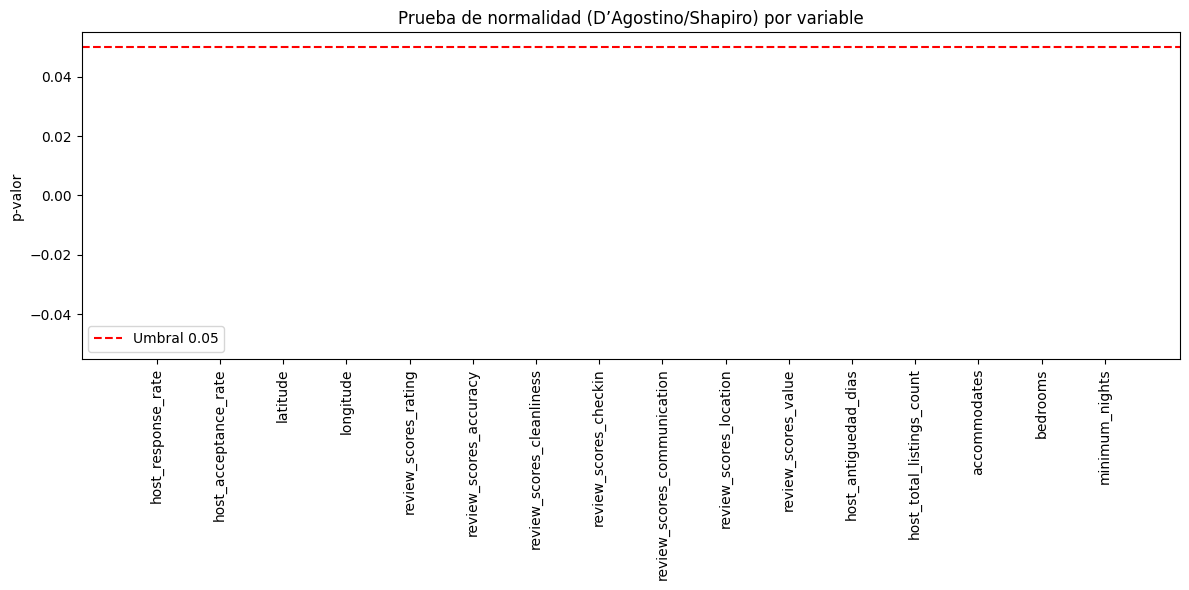

In [11]:
import matplotlib.pyplot as plt

# Asegúrate de usar el DataFrame con los resultados: df_resultados
plt.figure(figsize=(12, 6))
plt.bar(df_resultados['Variable'], df_resultados['p-valor'], color='skyblue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.xticks(rotation=90)
plt.ylabel('p-valor')
plt.title('Prueba de normalidad (D’Agostino/Shapiro) por variable')
plt.legend()
plt.tight_layout()
plt.show()


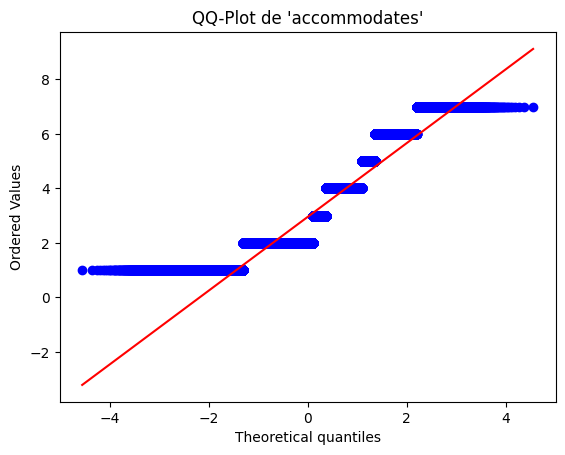

In [12]:
from scipy import stats

# Por ejemplo: revisar visualmente la distribución de 'accommodates'
import matplotlib.pyplot as plt

datos = variables_limpias['accommodates']
stats.probplot(datos, dist="norm", plot=plt)
plt.title("QQ-Plot de 'accommodates'")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Crear histogramas por cada variable limpia
for nombre, datos in variables_limpias.items():
    if len(datos) < 10:
        continue  # Saltar si hay muy pocos datos

    plt.figure(figsize=(6, 4))
    plt.hist(datos, bins=30, color='lightblue', edgecolor='black')
    plt.title(f"Histograma de '{nombre}' (datos limpios)")
    plt.xlabel(nombre)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
